# Tarea 9

### Sofía González Cataldo, rut 20.921.915-8

Use el método compuesto de Simpson y el método compuesto del trapecio para encontrar la siguiente integral

$$
\int_0^4 \frac{dx}{\sqrt{x^2 + 16}}
$$

Compare con el resultado exacto para obtener el error cometido. Grafique el error en función de $h$ para ambos métodos y compare con las fórmulas de error.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [65]:
def f(x):
    '''
    Función requerida para el problema.
    '''
    return 1/np.sqrt(x**2 + 16)

$$
\int_a^b dx\,f(x) = \frac{h}{2}\left[f(a) + 2\sum_{i=1}^{n-1} f(x_i) + f(b)\right]- \frac{h^2 (b-a)}{12}f''(\mu)
$$

In [66]:
# Fórmula compuesta del trapecio
def trapecio(f, a, b, n):
    '''
    Función que aproxima la integral con la fórmula compuesta del trapecio.
    '''
    h = (b - a)/n
    xi = [a + i*h for i in range(1, n)] # x_i
    fx = [f(x) for x in xi] # f(x_i)
    return (h/2)*(f(a) + 2*sum(fx) + f(b)), h

In [67]:
int_trapecio, h1 = trapecio(f, 0, 4, 6)
int_trapecio

0.8805548962351778

$$
\int_a^b dx\,f(x) = \frac{h}{3}\left[f(a) + 2\sum_{i=1}^{n/2-1} f(x_{2i}) + 4\sum_{i=1}^{n/2} f(x_{2i-1}) + f(b)\right]- \frac{h^4 (b-a)}{180}f''(\mu)
$$

In [68]:
# Fórmula compuesta de Simpson
def simpson(f, a, b, n):
    '''
    Función que aproxima la integral con la fórmula compuesta de simpson.
    '''
    h = (b - a)/n
    xi = [a + 2*i*h for i in range(1, int((n/2) - 1) + 1)] # x_2i 
    xj = [a + (2*i - 1)*h for i in range(1, int((n/2) + 1))] # x_(2i-1)
    fxi = [f(x) for x in xi] # términos f(x_2i)
    fxj = [f(x) for x in xj] # términos f(x_(2i-1))
    return (h/3)*(f(a) + 2*sum(fxi) + 4*sum(fxj) + f(b)), h

In [69]:
int_simpson, h2 = simpson(f, 0, 4, 6)
int_simpson

0.8813746413156114

In [70]:
exacta, error = integrate.quad(f, 0, 4)
exacta

0.8813735870195429

El valor exacto de la integral es 0.8813735870195429, mientras que el resultado obtenido por la fórmula del Trapecio fue 0.8805548962351778 y por la regla de Simpson fue 0.8813746413156114

### Errores de cada método

In [71]:
err_trapecio = abs((exacta - int_trapecio)/exacta)
print(f'El error obtenido para la fórmula del trapecio es {err_trap}')

El error obtenido para la fórmula del trapecio es 0.000928880552381457


In [72]:
err_simpson = abs((exacta - int_simpson)/exacta)
print(f'El error obtenido para la fórmula de simpson es {err_simp}')

El error obtenido para la fórmula de simpson es 1.1961965776772154e-06


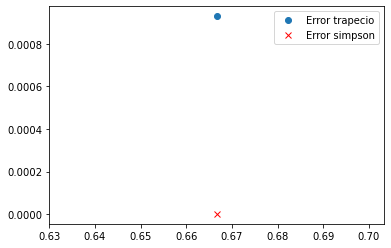

In [73]:
x = np.linspace(0, 100, 100)
plt.plot(h1, err_trapecio, 'o', label='Error trapecio')
plt.plot(h2, err_simpson, 'x', label='Error simpson', color='red')
plt.legend()

El error para la fórmula del trapecio está dado por: 
$$
\frac{h^2 (b-a)}{12}f''(\mu)
$$

$$
\frac{(4-0)^2 (4-0)}{6^2\cdot 12}f''(\mu) \approx 0.14\cdot f''(\mu)
$$

El error para la fórmula de Simpson está dado por: 
$$
\frac{h^4 (b-a)}{180}f''(\mu)
$$

$$
\frac{(4-0)^4 (4-0)}{6^4\cdot 180}f''(\mu) \approx 0.00439 \cdot f''(\mu)
$$

Podemos observar que la constante que acompaña a $f''(\mu)$ en la fórmula del trapecio, es un valor grande en comparación a la constante de la fórmula de Simpson, lo que concuerda con los resultados obtenidos en los errores relativos de cada método, ya que cualquiera sea el valor que tome $f''(\mu)$, aún así el error de simpson seguirá siendo menor al del método del trapecio.